In [1]:

def d3_armor_reduction(df):
    df_c = df.copy()
    df_c['d3_res_reduction'] = (df_c['armor'] / (df_c['armor'] + df_c['lvl'] * 5)) * 100
    df_c['d3_res_dmg_taken'] = df_c['dpt100'] / 100 * (100 - df_c['d3_res_reduction'])
    return df_c


def lol_res_reduction(df):
    df_c = df.copy()
    lol_multi_cond = [df_c['armor'] < 0, df_c['armor'] >= 0]
    lol_neg_def = 2 - (100 / (100 - df_c['armor']))
    lol_pos_def = 100 / (100 + df_c['armor'])

    df_c['dmg_multi_lol'] = np.select(lol_multi_cond, [lol_neg_def, lol_pos_def])
    df_c['lol_dmg_taken'] = df_c['dmg_multi_lol'] * df_c['dpt100']
    return df_c


def avg_dmg_redu_dodge(df):
    df_c = df.copy()
    df_c['lol_dmg_redu_dodge'] = df_c['lol_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    df_c['d3_dmg_redu_dodge'] = df_c['d3_res_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    return df_c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from all import *
f_results = fight_results[fight_results.columns[-(len(cl_df_list)*2):]]


In [3]:
f_results.apply(lambda row: [(unit.name, round(unit.hp / unit.max_hp * 100, 2)) for unit in row])

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
0,"(dex_cl, 1.48)","(str_cl, 6.67)","(int_cl, 5.56)","(str_cl, 13.33)","(int_cl, 12.59)","(int_cl, 4.07)"
1,"(str_cl, 34.52)","(int_cl, 2.37)","(int_cl, 23.39)","(str_cl, 25.48)","(int_cl, 27.8)","(int_cl, 32.2)"
2,"(str_cl, 30.29)","(int_cl, 6.25)","(int_cl, 33.75)","(str_cl, 10.0)","(int_cl, 17.81)","(int_cl, 12.81)"
3,"(str_cl, 33.33)","(str_cl, 4.62)","(int_cl, 24.06)","(str_cl, 38.46)","(int_cl, 24.64)","(int_cl, 31.01)"
4,"(str_cl, 29.53)","(str_cl, 3.26)","(int_cl, 37.3)","(str_cl, 35.81)","(int_cl, 5.14)","(int_cl, 50.54)"
5,"(str_cl, 38.3)","(int_cl, 12.15)","(int_cl, 23.54)","(str_cl, 15.11)","(int_cl, 9.62)","(int_cl, 41.27)"
6,"(str_cl, 36.47)","(int_cl, 10.95)","(int_cl, 22.86)","(str_cl, 35.88)","(str_cl, 0.39)","(int_cl, 43.33)"
7,"(str_cl, 37.09)","(int_cl, 2.02)","(int_cl, 51.91)","(dex_cl, 8.73)","(str_cl, 39.27)","(int_cl, 40.9)"
8,"(str_cl, 21.69)","(int_cl, 8.09)","(int_cl, 1.49)","(str_cl, 23.39)","(str_cl, 15.59)","(int_cl, 40.85)"
9,"(str_cl, 27.3)","(str_cl, 10.16)","(int_cl, 35.56)","(str_cl, 20.95)","(str_cl, 1.11)","(int_cl, 21.21)"


In [4]:
get_unit_attribute(f_results, 'name').describe()

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
count,30,30,30,30,30,30
unique,2,2,2,2,2,2
top,str_cl,int_cl,int_cl,dex_cl,int_cl,int_cl
freq,16,18,21,16,20,22


In [18]:
# approx turns it took to win
turns_to_win = (get_unit_attribute(f_results, 'ct_to_win') / 100)[1:]  # clock ticks it took to win / 100 ticks (for a turn)
turns_to_win

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
1,44.62,42.68,39.77,18.43,15.52,17.46
2,36.48,30.72,26.88,22.08,15.36,18.24
3,30.72,27.84,30.08,16.32,14.10,15.98
4,30.40,25.65,20.46,16.15,14.88,10.23
5,26.32,23.92,19.32,21.62,13.80,12.88
6,25.11,17.29,17.29,15.81,13.02,9.10
7,22.08,18.00,12.60,23.49,11.96,12.60
8,30.36,16.02,17.80,17.48,14.72,9.79
9,24.57,15.47,15.66,19.11,13.65,12.18
10,30.71,16.20,17.43,19.80,9.46,11.18


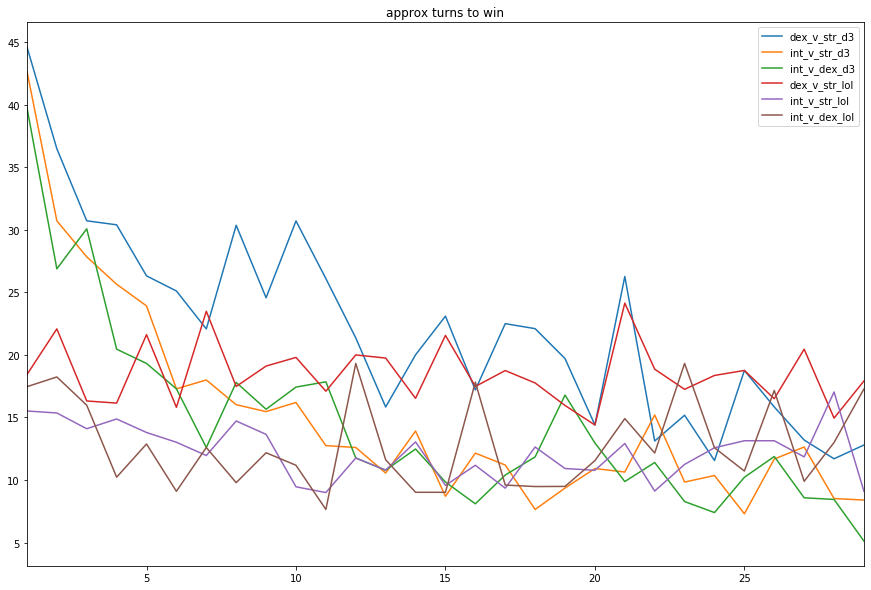

In [22]:

turns_to_win.plot(title='approx turns to win' ,figsize=[15,10])

In [6]:
compare(all_cl_df, ['speed', 'ticks_to_turn'])

,speed_dex,speed_str,speed_int,ticks_to_turn_dex,ticks_to_turn_str,ticks_to_turn_int
0,10.24,10.24,10.24,97.656250,97.656250,97.656250
1,10.43,10.33,10.38,95.877277,96.805421,96.339114
2,10.62,10.42,10.52,94.161959,95.969290,95.057034
3,10.81,10.51,10.66,92.506938,95.147479,93.808630
4,11.00,10.60,10.80,90.909091,94.339623,92.592593
5,11.19,10.69,10.94,89.365505,93.545370,91.407678
6,11.38,10.78,11.08,87.873462,92.764378,90.252708
7,11.57,10.87,11.22,86.430424,91.996320,89.126560
8,11.76,10.96,11.36,85.034014,91.240876,88.028169
9,11.95,11.05,11.50,83.682008,90.497738,86.956522


In [26]:
compare(all_cl_df, ['dodge', 'crit_dmg', 'crit_chan'])

,dodge_dex,dodge_str,dodge_int,crit_dmg_dex,crit_dmg_str,crit_dmg_int,crit_chan_dex,crit_chan_str,crit_chan_int
0,11.320,11.320,11.32,136.0,136.0,136.0,8.0,8.0,8.0
1,13.815,12.165,12.99,144.5,139.5,142.0,10.3,8.9,9.6
2,16.310,13.010,14.66,153.0,143.0,148.0,12.6,9.8,11.2
3,18.805,13.855,16.33,161.5,146.5,154.0,14.9,10.7,12.8
4,21.300,14.700,18.00,170.0,150.0,160.0,17.2,11.6,14.4
5,23.795,15.545,19.67,178.5,153.5,166.0,19.5,12.5,16.0
6,26.290,16.390,21.34,187.0,157.0,172.0,21.8,13.4,17.6
7,28.785,17.235,23.01,195.5,160.5,178.0,24.1,14.3,19.2
8,31.280,18.080,24.68,204.0,164.0,184.0,26.4,15.2,20.8
9,33.775,18.925,26.35,212.5,167.5,190.0,28.7,16.1,22.4


In [8]:
compare(all_cl_df, ['m_dmg_wo_wpn', 'p_dmg_wo_wpn', 'dpt100'])

,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,dpt100_dex,dpt100_str,dpt100_int
0,4.3,4.3,4.3,3.5,3.5,3.5,13.08,14.25,15.60
1,5.9,5.9,7.7,4.9,6.3,4.9,16.56,18.71,24.37
2,7.5,7.5,11.1,6.3,9.1,6.3,20.32,25.03,33.61
3,9.1,9.1,14.5,7.7,11.9,7.7,24.43,31.57,43.40
4,10.7,10.7,17.9,9.1,14.7,9.1,28.91,38.31,53.78
5,12.3,12.3,21.3,10.5,17.5,10.5,33.83,45.30,64.82
6,13.9,13.9,24.7,11.9,20.3,11.9,39.23,52.53,76.59
7,15.5,15.5,28.1,13.3,23.1,13.3,45.18,60.02,89.14
8,17.1,17.1,31.5,14.7,25.9,14.7,51.71,67.80,102.57
9,18.7,18.7,34.9,16.1,28.7,16.1,58.90,75.87,116.93


In [9]:
compare(all_cl_df, ['m_dmg', 'p_dmg', 'dpt100'])

,m_dmg_dex,m_dmg_str,m_dmg_int,p_dmg_dex,p_dmg_str,p_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,12.42,13.53,14.81,11.04,11.94,12.98,13.08,14.25,15.60
1,15.18,16.70,22.57,13.45,17.50,16.18,16.56,18.71,24.37
2,17.94,19.88,30.32,15.87,23.05,19.37,20.32,25.03,33.61
3,20.70,23.05,38.08,18.28,28.61,22.57,24.43,31.57,43.40
4,23.46,26.23,45.84,20.70,34.16,25.76,28.91,38.31,53.78
5,26.22,29.40,53.59,23.11,39.72,28.95,33.83,45.30,64.82
6,28.98,32.57,61.35,25.53,45.27,32.15,39.23,52.53,76.59
7,31.74,35.75,69.10,27.94,50.82,35.34,45.18,60.02,89.14
8,34.50,38.92,76.86,30.36,56.38,38.54,51.71,67.80,102.57
9,37.26,42.10,84.62,32.77,61.93,41.73,58.90,75.87,116.93


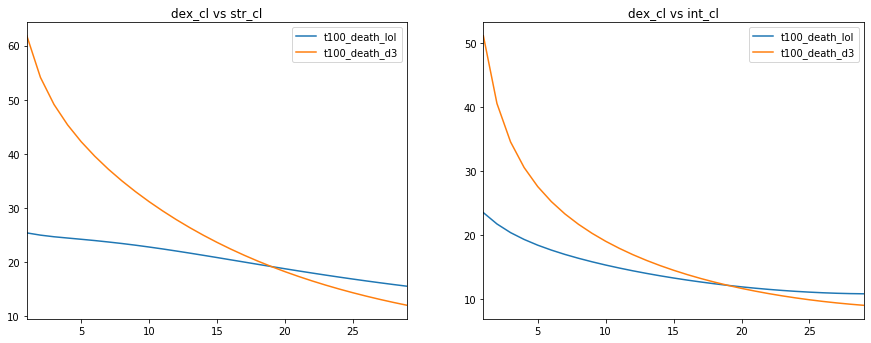

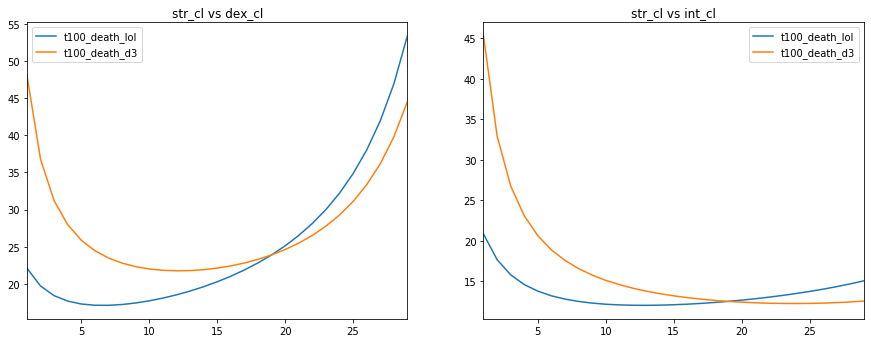

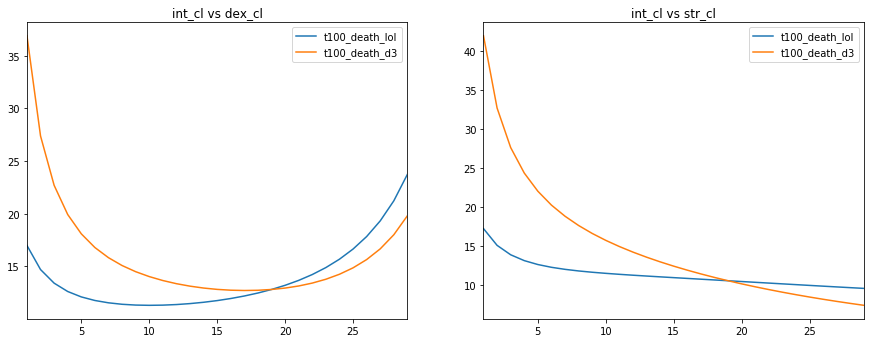

In [23]:
# how many 100clock ticks does it take to kill the defender
for i,attacker in enumerate(cl_df_list):
    cl_df_l_copy = cl_df_list.copy()
    cl_df_l_copy.pop(i)
    
    fig = plt.figure(figsize=[15, 12])
    for n, defender in enumerate(cl_df_l_copy):
        ax = fig.add_subplot(221+n)
        test_df = pd.concat([attacker[['dpt100', 'lvl']], defender[['dodge', 'd3_res_reduction', 'dmg_multi_lol', 'hp', 'armor']]], axis=1)
        
        test_df = d3_armor_reduction(test_df)
        test_df = lol_res_reduction(test_df)
        test_df = avg_dmg_redu_dodge(test_df)
        test_df['t100_death_lol'] = test_df['hp'] / test_df['lol_dmg_redu_dodge']
        test_df['t100_death_d3'] = test_df['hp'] / test_df['d3_dmg_redu_dodge']
        test_df[['t100_death_lol', 't100_death_d3']].iloc[1:].plot(title=attacker.name+' vs '+defender.name, ax=ax)

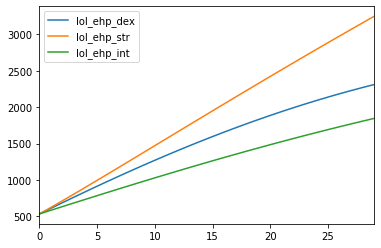

In [11]:
compare(all_cl_df, ['lol_ehp',]).plot()

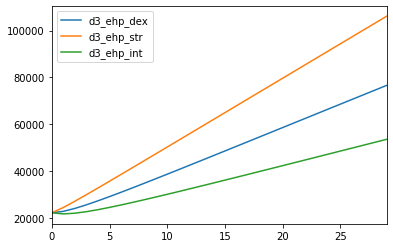

In [11]:
compare(all_cl_df, ['d3_ehp',]).plot()

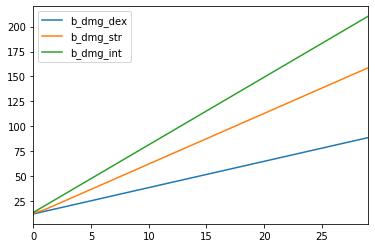

In [12]:
compare(all_cl_df, ['b_dmg',]).plot()

In [13]:
cl_df_l_copy = cl_df_list.copy()

In [14]:
cl_df_l_copy[0]

,lvl,vit,dex,str,int,u_name,speed,ticks_to_turn,hp,p_dmg_wo_wpn,...,armor,dodge,d3_res_reduction,d3_res_dmg_taken,dmg_multi_lol,lol_dmg_taken,lol_dmg_redu_dodge,d3_dmg_redu_dodge,lol_ehp,d3_ehp
0,1,4,4,4,4,dex_cl,10.24,97.656250,270,3.5,...,20,11.320,80.000000,2.550000,0.833333,10.625000,9.422250,2.261340,554.436000,22109.436000
1,2,6,7,5,5,dex_cl,10.43,95.877277,310,4.9,...,25,13.815,71.428571,4.594286,0.800000,12.864000,11.086838,3.959585,639.173500,22720.030643
2,3,8,10,6,6,dex_cl,10.62,94.161959,350,6.3,...,30,16.310,66.666667,6.563333,0.769231,15.146154,12.675816,5.492854,723.684231,23976.248333
3,4,10,13,7,7,dex_cl,10.81,92.506938,390,7.7,...,35,18.805,63.636364,8.585455,0.740741,17.488889,14.200103,6.970960,807.771611,25524.842318
4,5,12,16,8,8,dex_cl,11.00,90.909091,430,9.1,...,40,21.300,61.538462,10.734615,0.714286,19.935714,15.689407,8.448142,891.267143,27229.948462
5,6,14,19,9,9,dex_cl,11.19,89.365505,470,10.5,...,45,23.795,60.000000,13.052000,0.689655,22.503448,17.148753,9.946277,974.025569,29028.163500
6,7,16,22,10,10,dex_cl,11.38,87.873462,510,11.9,...,50,26.290,58.823529,15.568824,0.666667,25.206667,18.579834,11.475780,1055.921000,30885.921000
7,8,18,25,11,11,dex_cl,11.57,86.430424,550,13.3,...,55,28.785,57.894737,18.324211,0.645161,28.077419,19.995334,13.049587,1136.843790,32783.787763
8,9,20,28,12,12,dex_cl,11.76,85.034014,590,14.7,...,60,31.280,57.142857,21.338571,0.625000,31.118750,21.384805,14.663866,1216.698000,34709.733714
9,10,22,31,13,13,dex_cl,11.95,83.682008,630,16.1,...,65,33.775,56.521739,24.647826,0.606061,34.357576,22.753305,16.323023,1295.399318,36655.913152
